Model: MLPClassifier
Accuracy: 98.84%
Precision: 97.95%
Recall: 97.95%
F1 Score: 97.95%
ROC AUC: 99.45%


Model: Decision Tree
Accuracy: 94.40%
Precision: 89.30%
Recall: 91.13%
F1 Score: 90.20%
ROC AUC: 93.41%


Model: Random Forest
Accuracy: 97.68%
Precision: 94.98%
Recall: 96.93%
F1 Score: 95.95%
ROC AUC: 99.74%


Model: SVM
Accuracy: 96.23%
Precision: 90.45%
Recall: 96.93%
F1 Score: 93.57%
ROC AUC: 99.60%


Model: Naive Bayes
Accuracy: 97.10%
Precision: 95.19%
Recall: 94.54%
F1 Score: 94.86%
ROC AUC: 99.29%




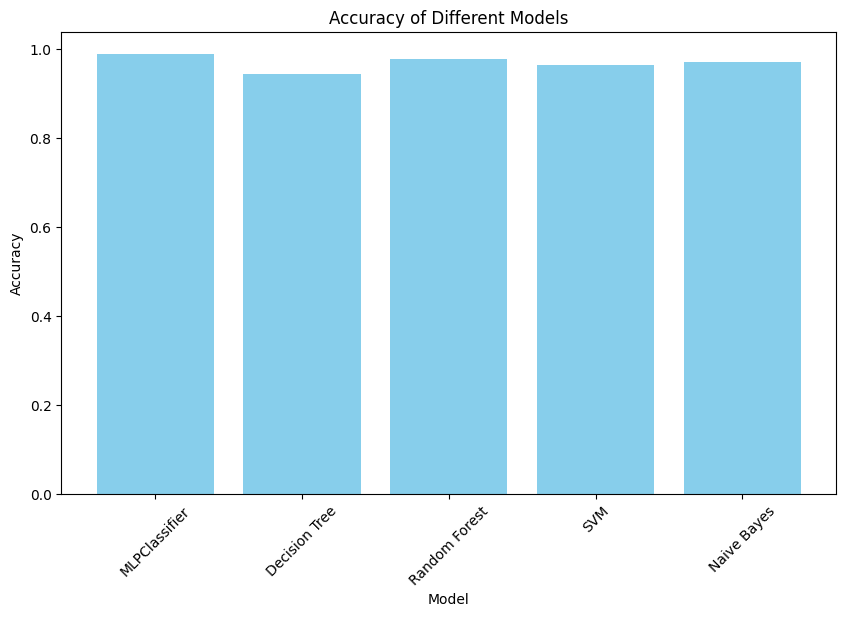

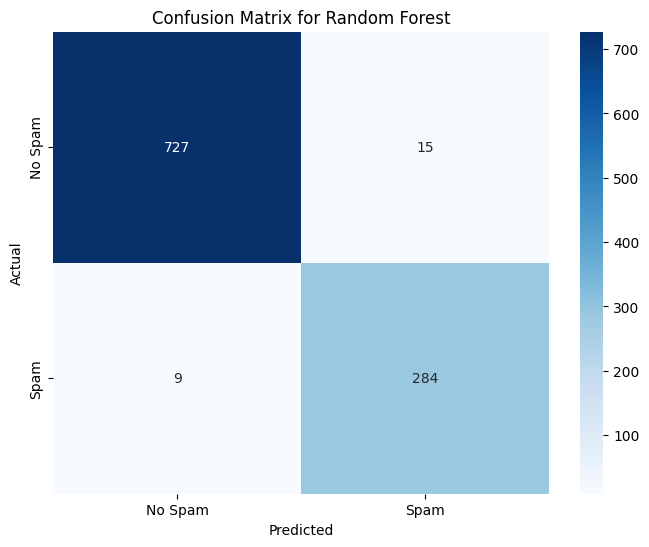

In [1]:
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns

# Load environment variables
load_dotenv(dotenv_path=".env")

# Load dataset
df = pd.read_csv(os.getenv("DATASET_PATH"))

# Preprocess dataset
df = df.dropna()
X = df['text']
y = df['label_num']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Define models
models = {
    "MLPClassifier": MLPClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
}

# Initialize dictionary to store accuracies and metrics
metrics = {}

# Directory to save models
model_dir = os.getenv("MODEL_PATH")
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# # Save the trained vectorizer
vectorizer_filename = os.path.join(model_dir, 'vectorizer.pkl')
joblib.dump(vectorizer, vectorizer_filename)

# Train, evaluate, and save models
for name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)
    
    # Evaluate the model
    predictions = model.predict(X_test_vec)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_vec)[:, 1])  # For binary classification
    
    # Store metrics
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }
    
    # Save the trained model
    model_filename = os.path.join(model_dir, f'{name.replace(" ", "_")}_model.pkl')
    joblib.dump(model, model_filename)

# Display metrics for all models
for model_name, model_metrics in metrics.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in model_metrics.items():
        print(f"{metric_name}: {metric_value * 100:.2f}%")
    print("\n")

# Plotting the accuracy of each model
accuracy_scores = {model_name: model_metrics['Accuracy'] for model_name, model_metrics in metrics.items()}
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()

# Confusion Matrix for one of the models 
conf_matrix = confusion_matrix(y_test, models["Random Forest"].predict(X_test_vec))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Spam", "Spam"], yticklabels=["No Spam", "Spam"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
